<a href="https://colab.research.google.com/github/Katherine-Gatica-BS/Portafolio/blob/main/Adult_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso Adult

El conjunto de datos "Adult Income Dataset" se utiliza para predecir si una persona tiene un nivel de ingresos anuales mayor o menor a un umbral específico. Se basa en una variedad de características demográficas y laborales.

En este caso se estara utilizando el modelo Naive Bayes.

In [ ]:
#se importan las librerias necesarias
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, recall_score

from sklearn.feature_selection import SelectKBest
df_adult = pd.read_csv("/content/sample_data/3.2.3 adult.csv")
df_adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
#se cuentan las Columnas y Filas
df_adult.shape

(32561, 15)

In [ ]:
# Obtenemos el tipo de dato de cada columna
df_adult.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [ ]:
#Contamos los nulos
for feature in df_adult.columns:
  print ('Total de valores nulos de', feature , '=', df_adult[feature].isna().sum())

Total de valores nulos de age = 0
Total de valores nulos de workclass = 0
Total de valores nulos de fnlwgt = 0
Total de valores nulos de education = 0
Total de valores nulos de education.num = 0
Total de valores nulos de marital.status = 0
Total de valores nulos de occupation = 0
Total de valores nulos de relationship = 0
Total de valores nulos de race = 0
Total de valores nulos de sex = 0
Total de valores nulos de capital.gain = 0
Total de valores nulos de capital.loss = 0
Total de valores nulos de hours.per.week = 0
Total de valores nulos de native.country = 0
Total de valores nulos de income = 0


In [ ]:
# Listado de las columnas del dataframe
print(df_adult.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


In [ ]:
# Valores únicos
for feature in df_adult.columns:
  print('Valores únicos de', feature, '=', df_adult[feature].unique())

Valores únicos de age = [90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59
 60 63 53 44 43 71 48 73 67 40 50 42 39 55 47 31 58 62 36 72 78 83 26 70
 27 35 81 65 25 28 56 69 20 30 24 64 75 19 77 80 18 17 76 79 88 84 85 86
 87]
Valores únicos de workclass = ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
Valores únicos de fnlwgt = [ 77053 132870 186061 ...  34066  84661 257302]
Valores únicos de education = ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
Valores únicos de education.num = [ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1]
Valores únicos de marital.status = ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
Valores únicos de occupation = ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 

In [ ]:
# valores unicos de la columna income.
df_adult['income'].value_counts()
# extracción de columnas numericas
numerica = [var for var in df_adult.columns if df_adult[var].dtype!='O']

In [ ]:
# extraccón de columnas categoricas
categorica = [var for var in df_adult.columns if df_adult[var].dtype=='O']

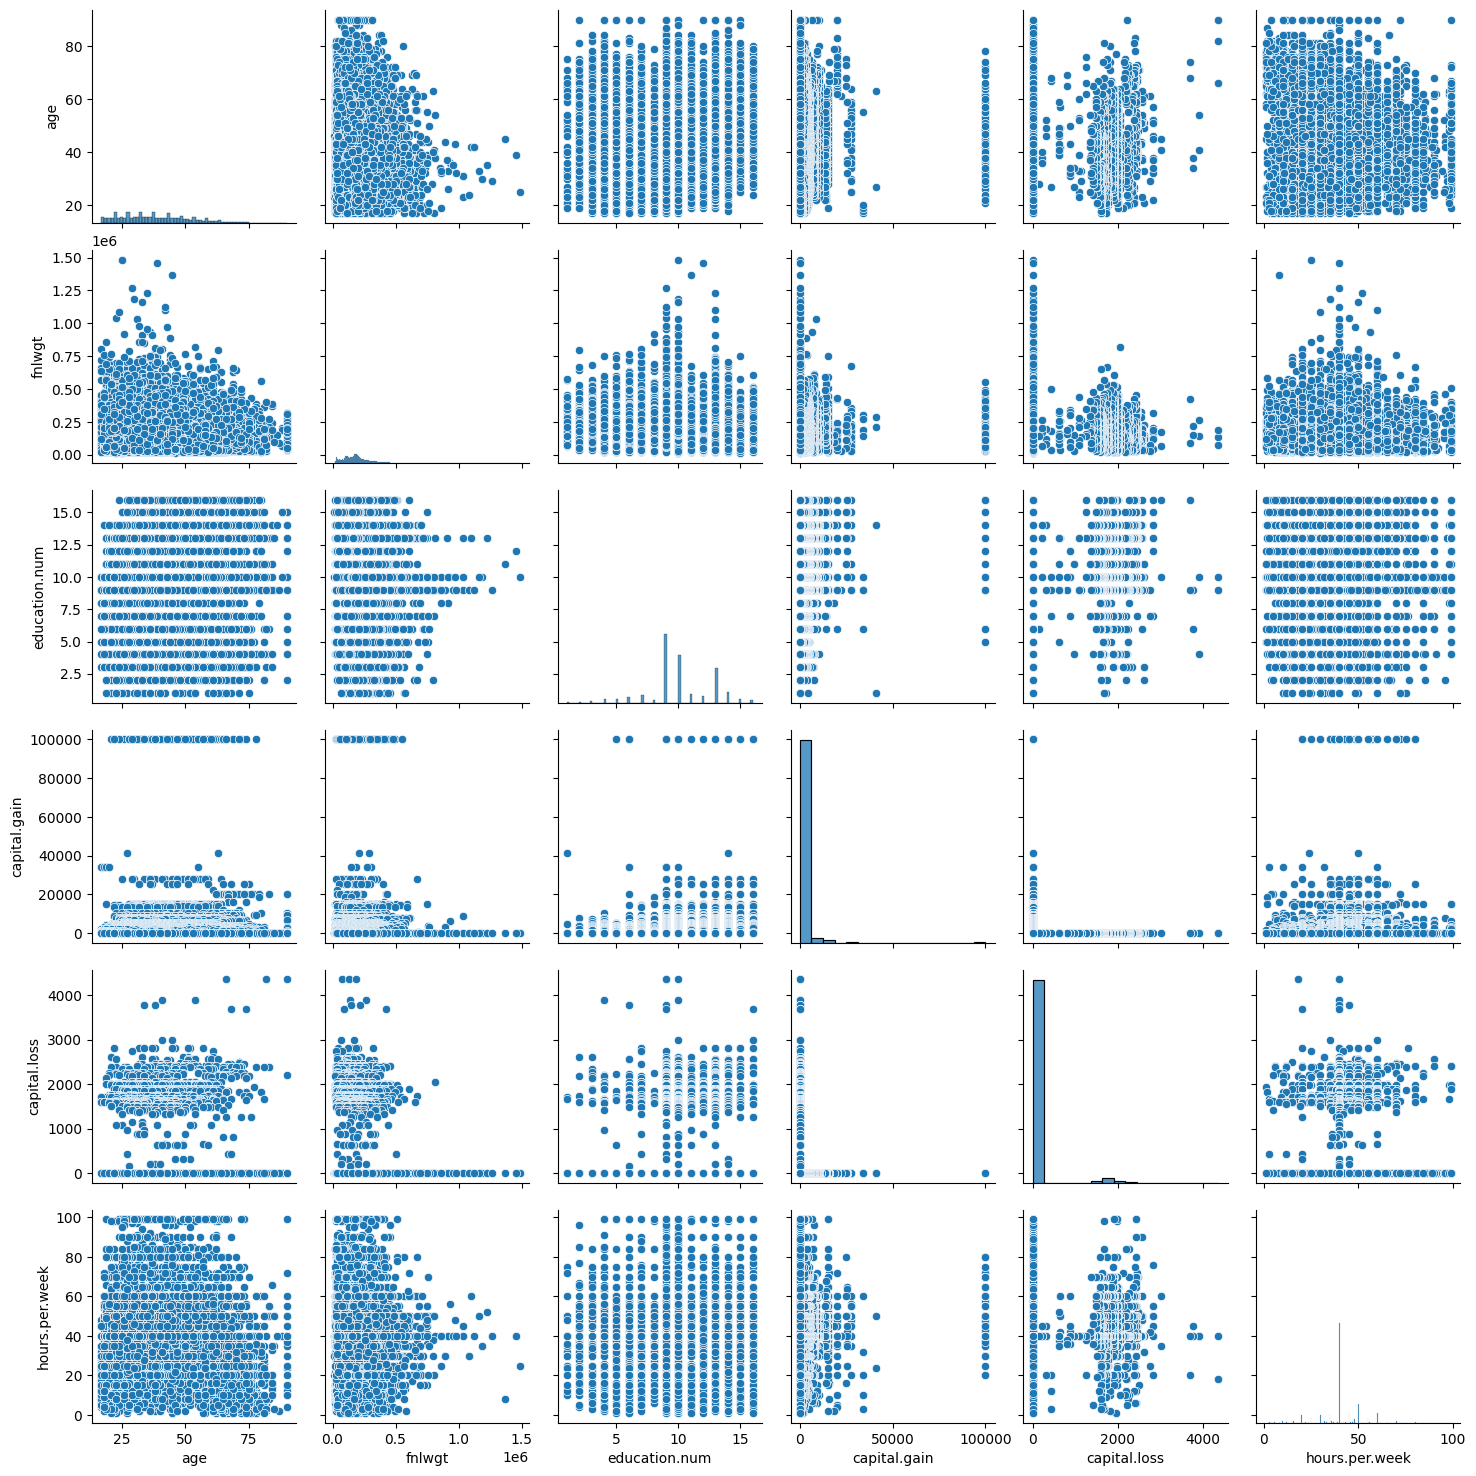

In [ ]:
# histograma general del dataframe
sns.pairplot(df_adult, kind='scatter', diag_kind='hist')
plt.show()

In [ ]:
# Medidas estadísticas 
df_adult.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# se crea un nuevo dataset que sea numerico numerico
df_nadult = df_adult[numerica]

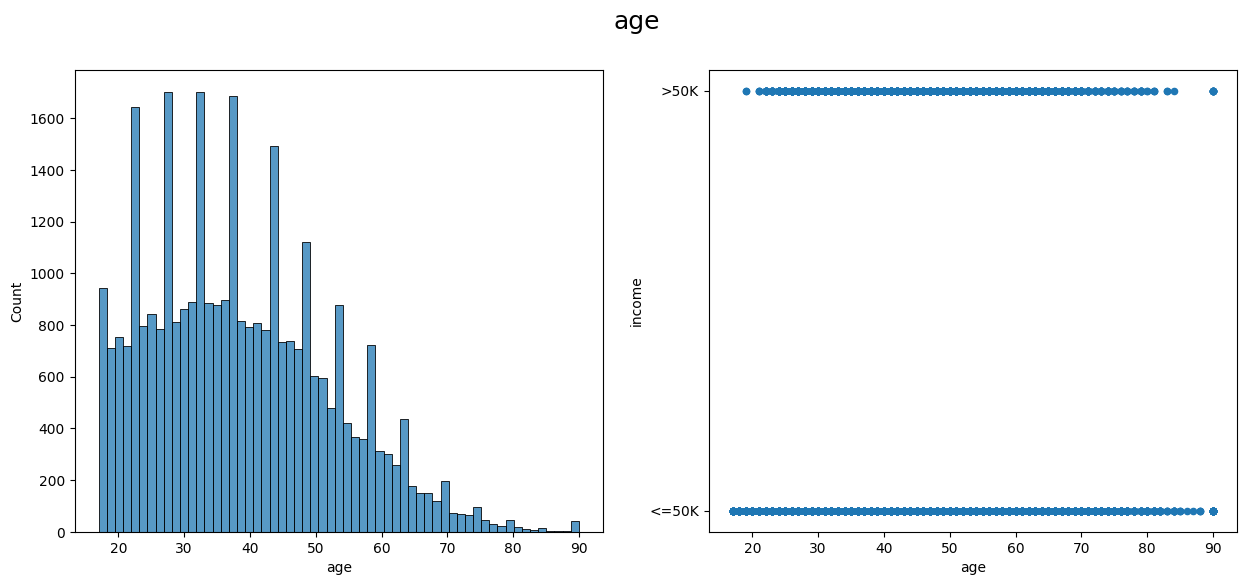

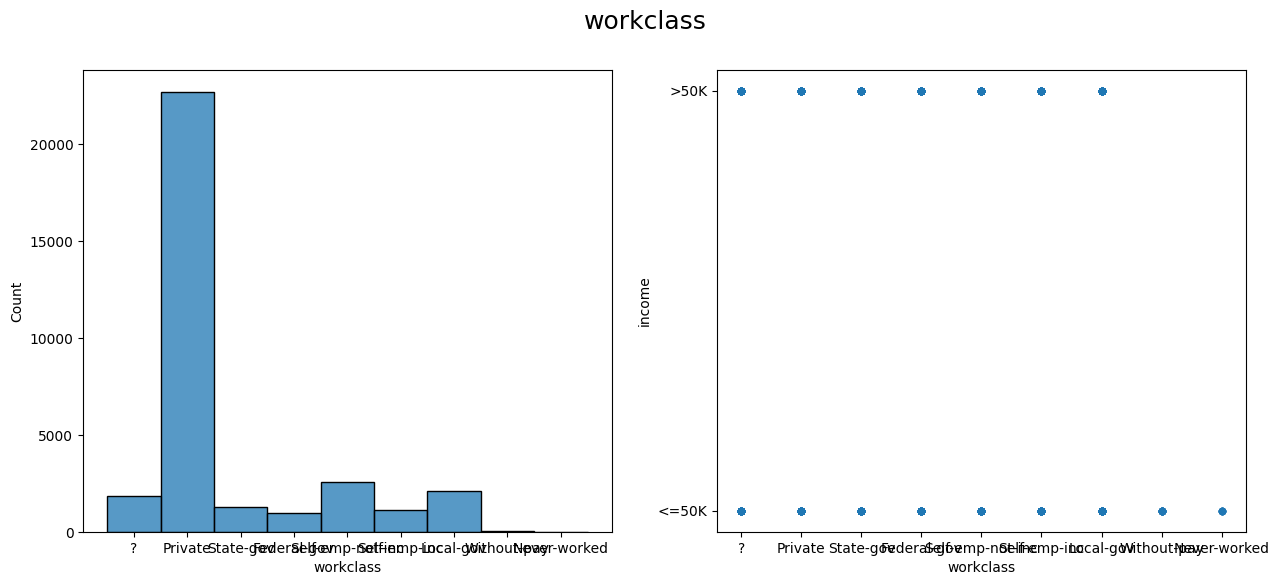

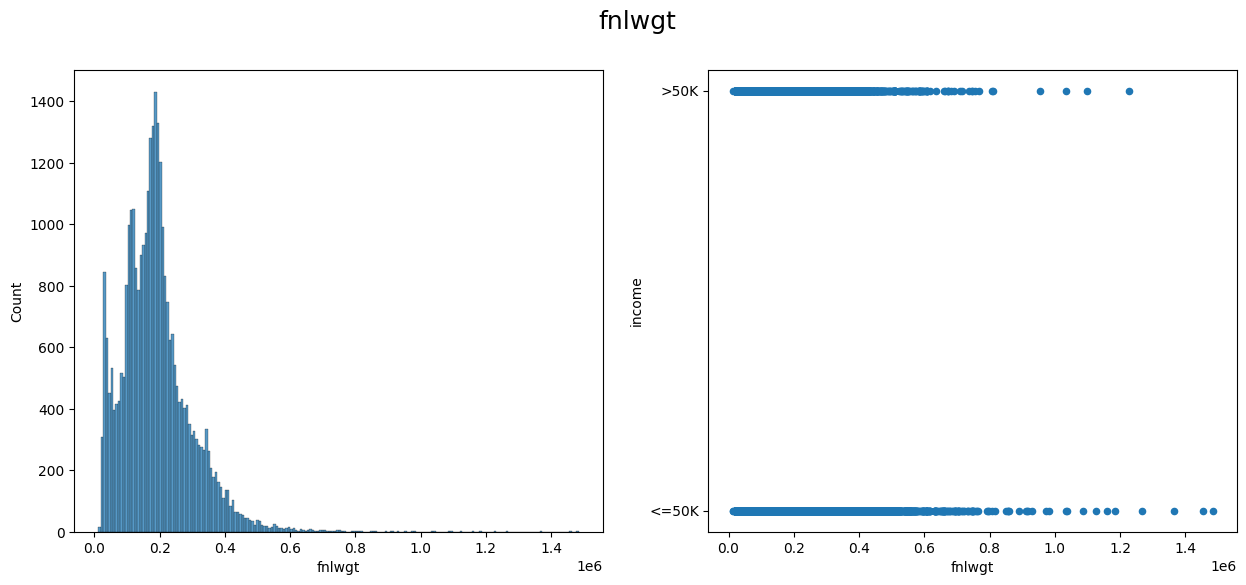

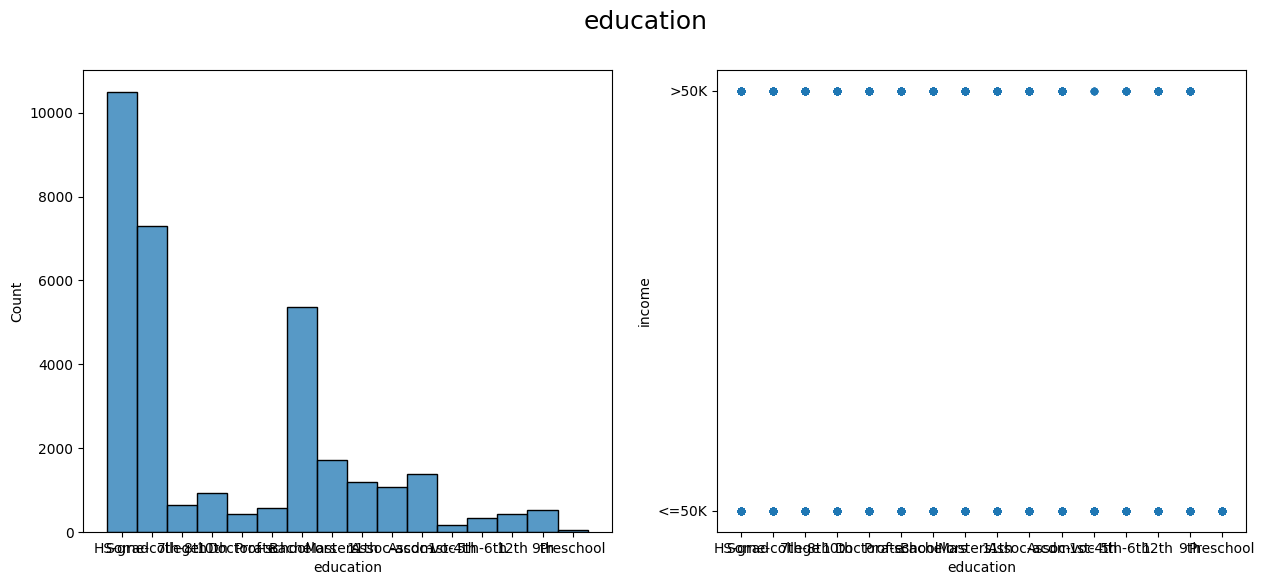

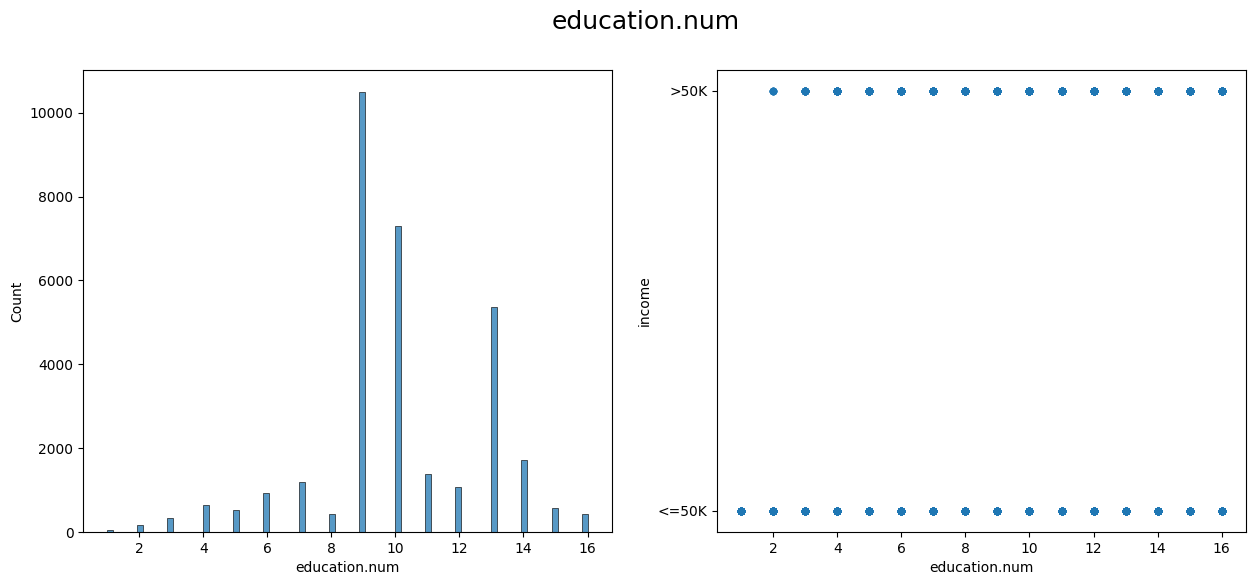

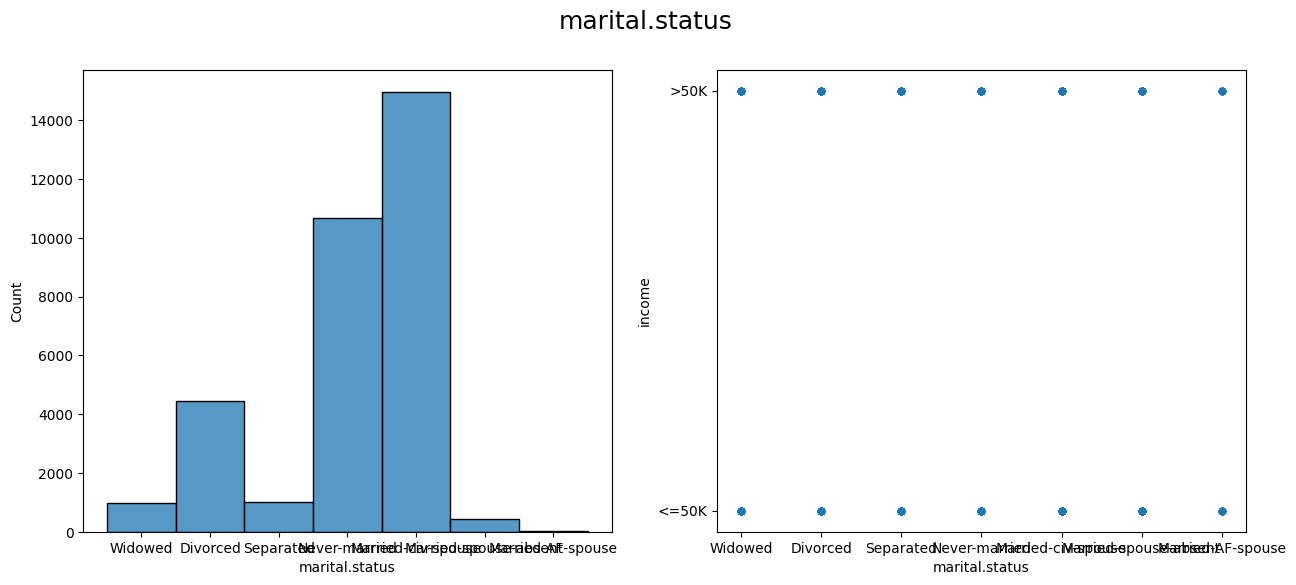

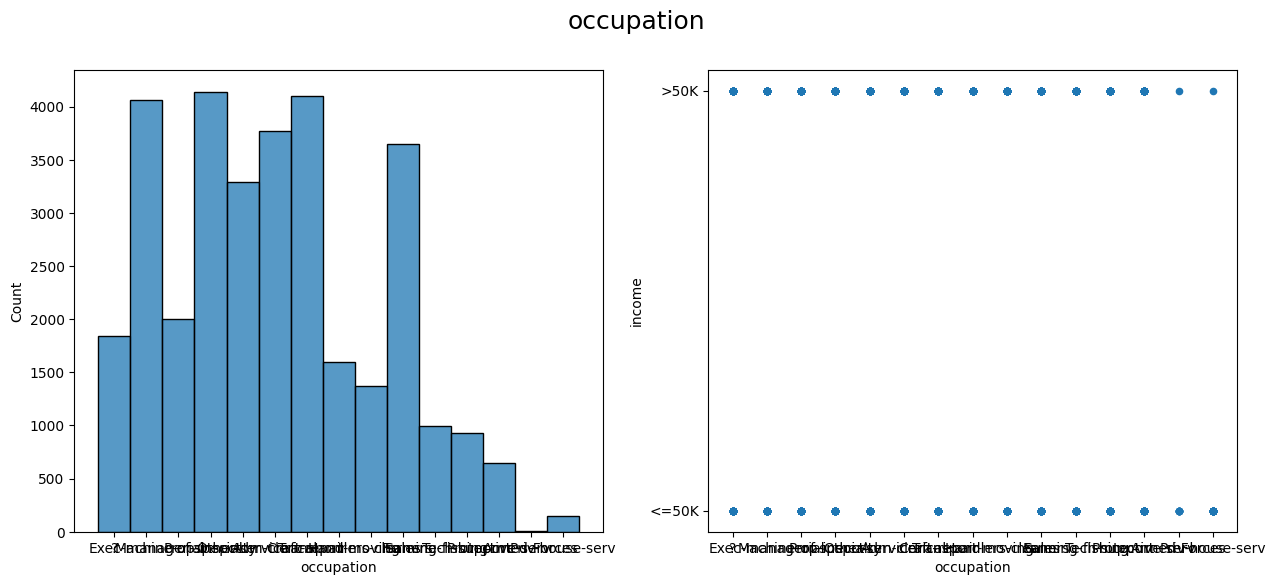

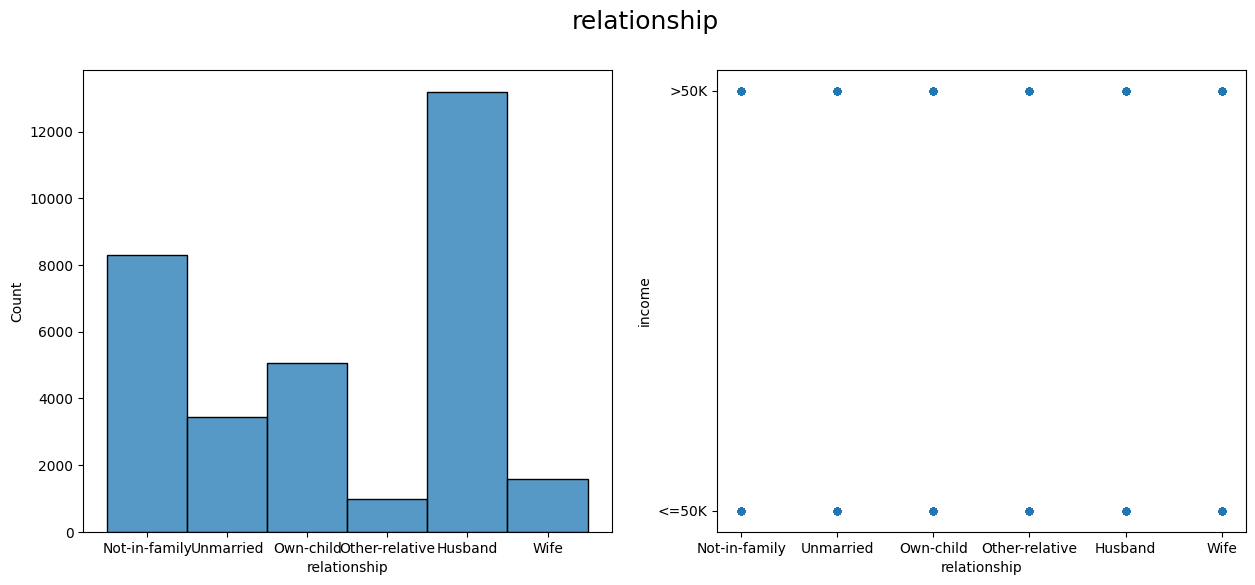

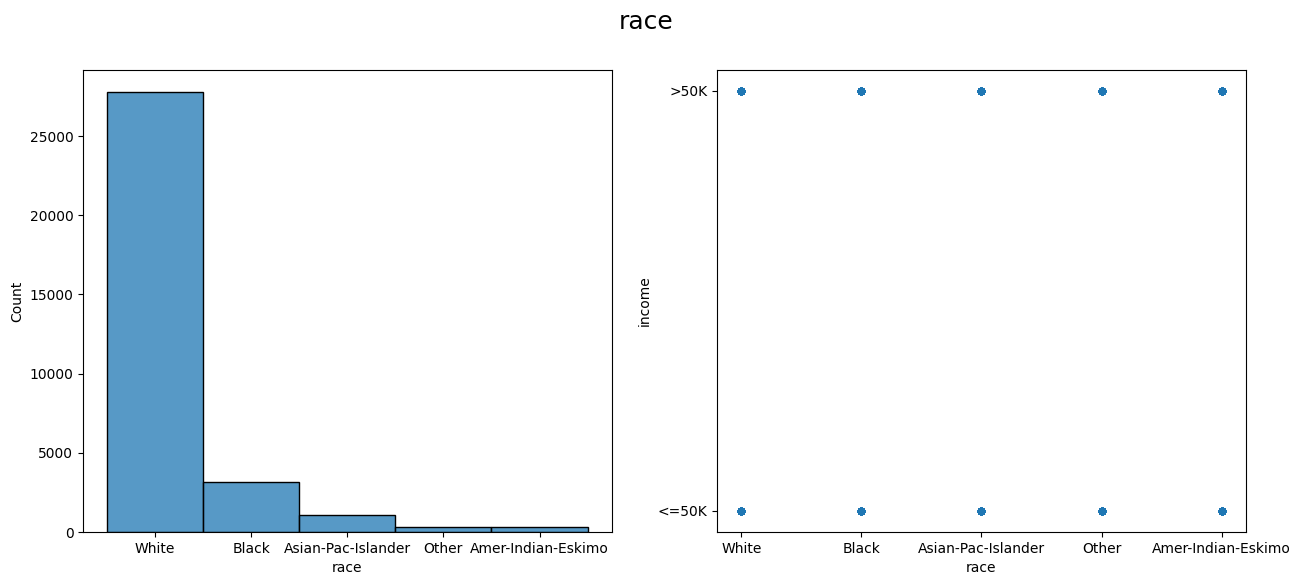

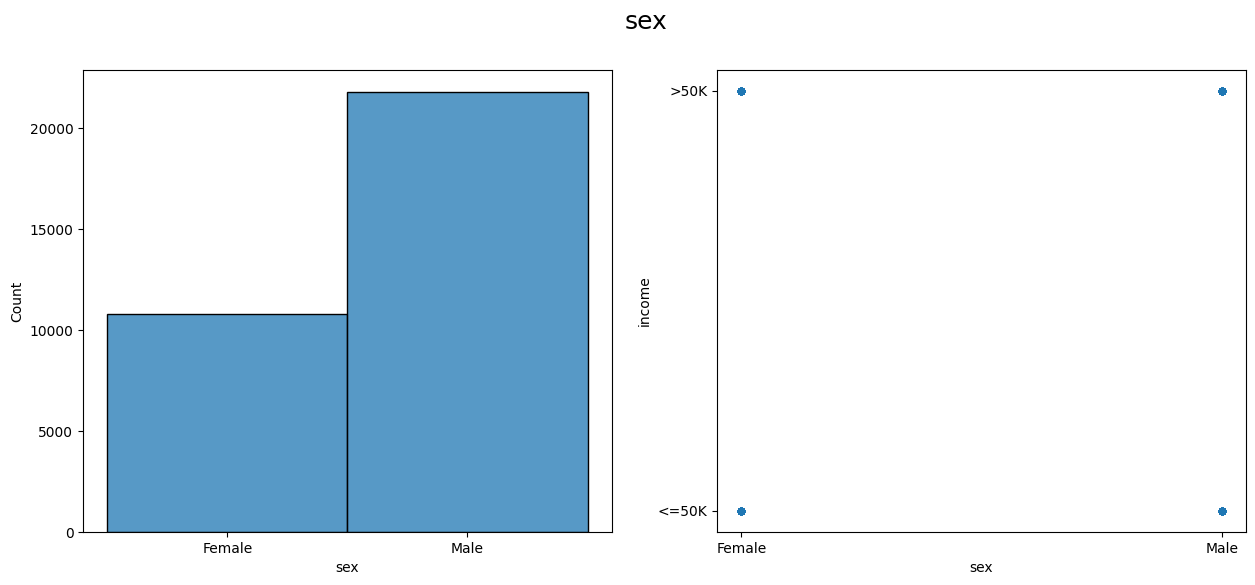

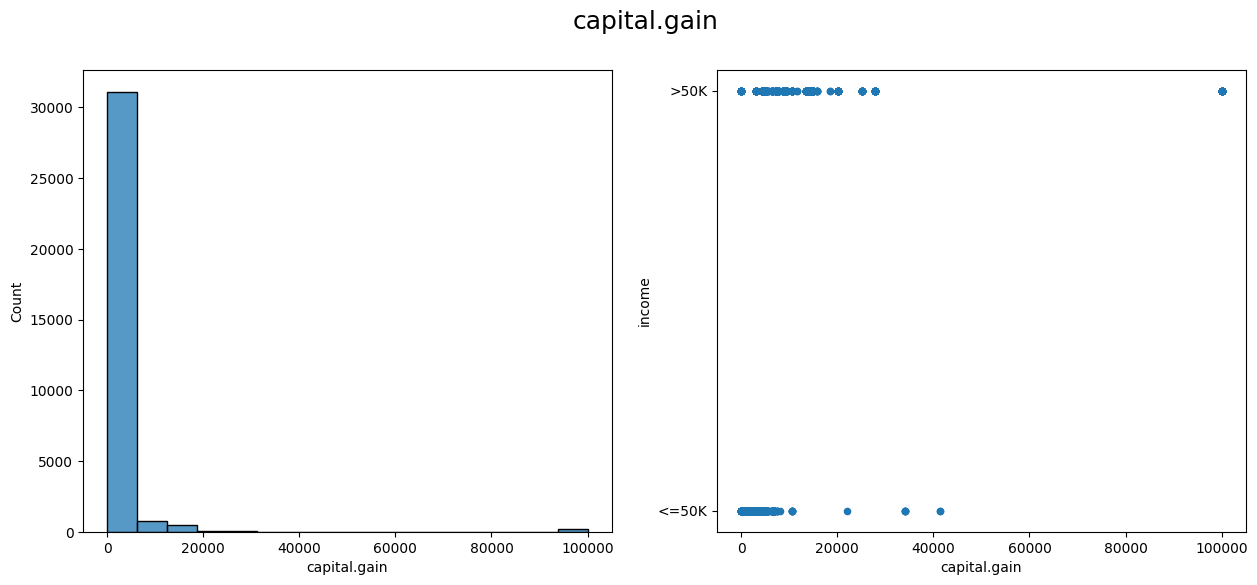

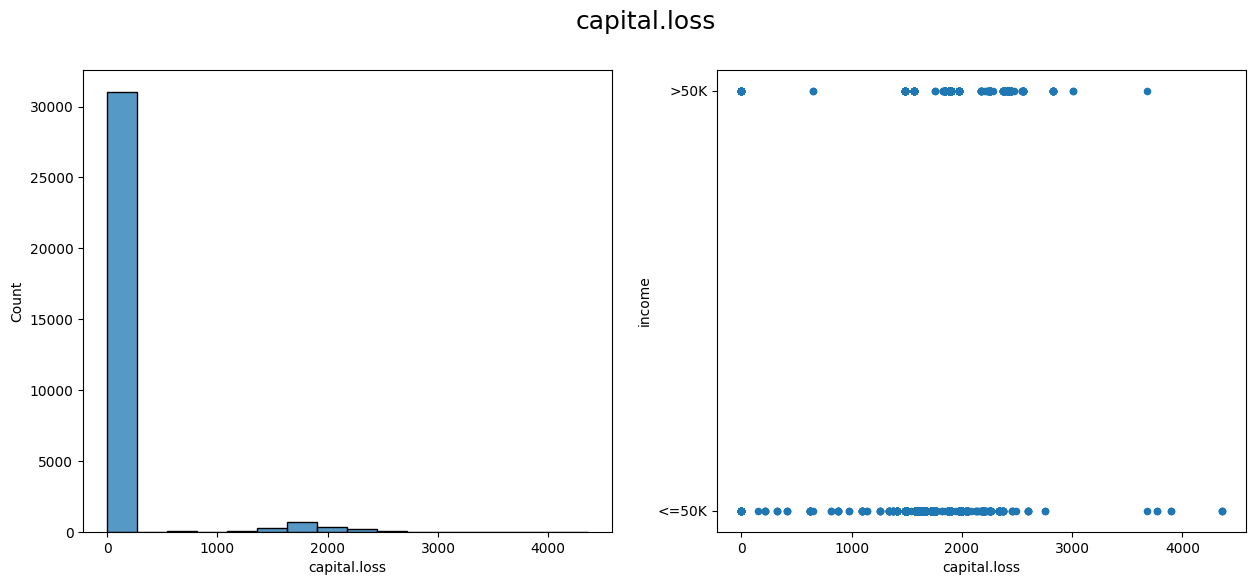

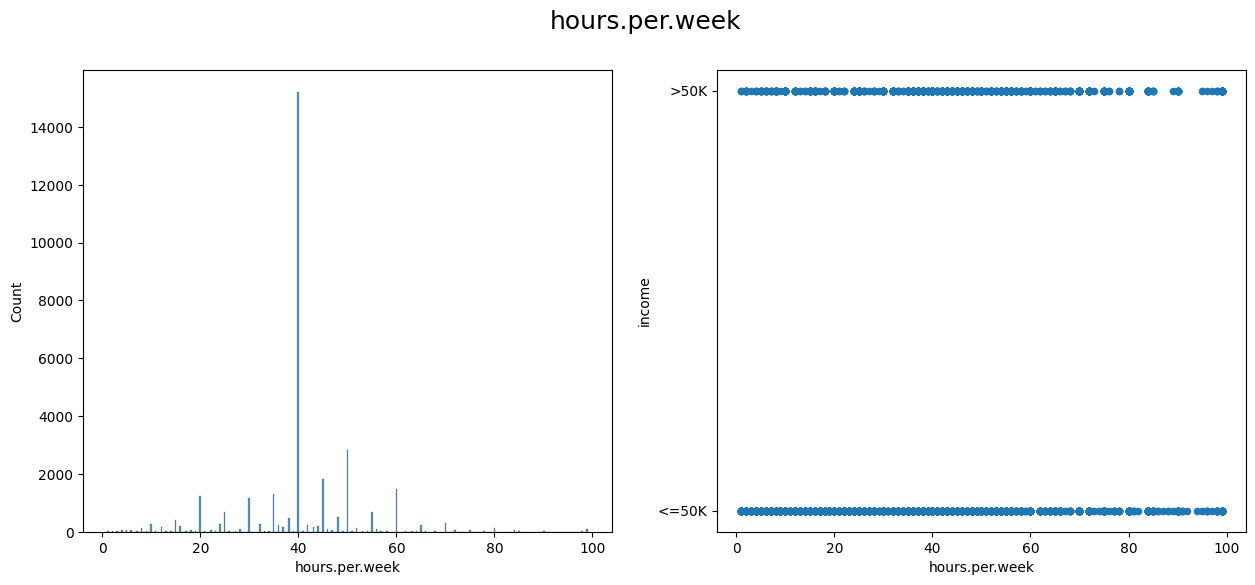

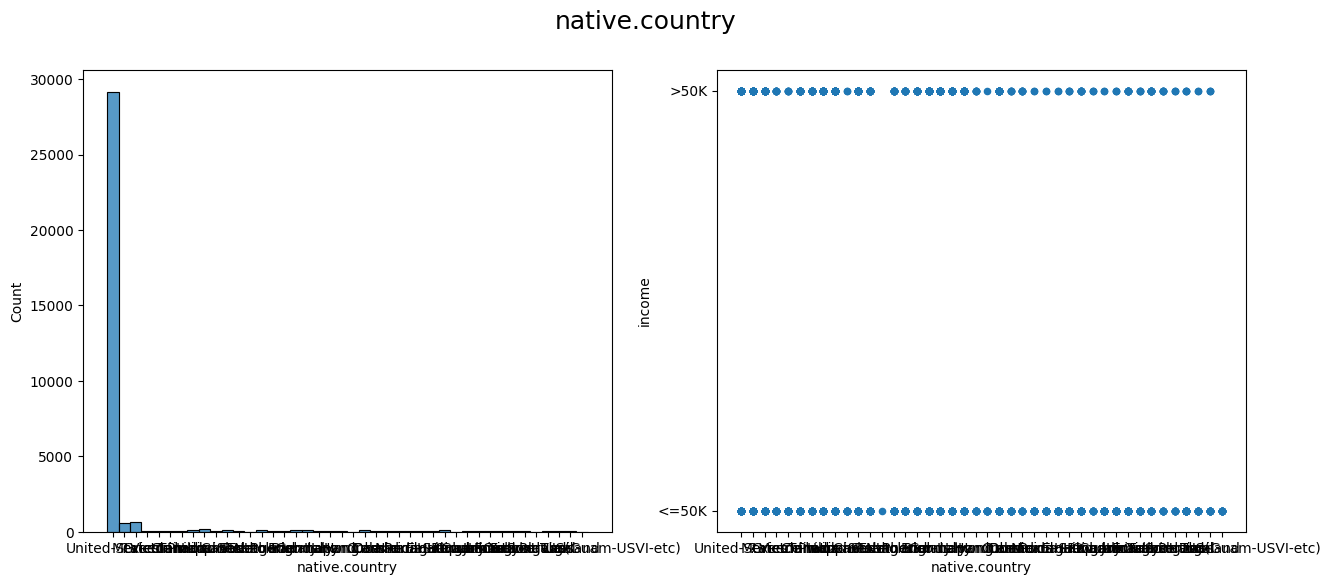

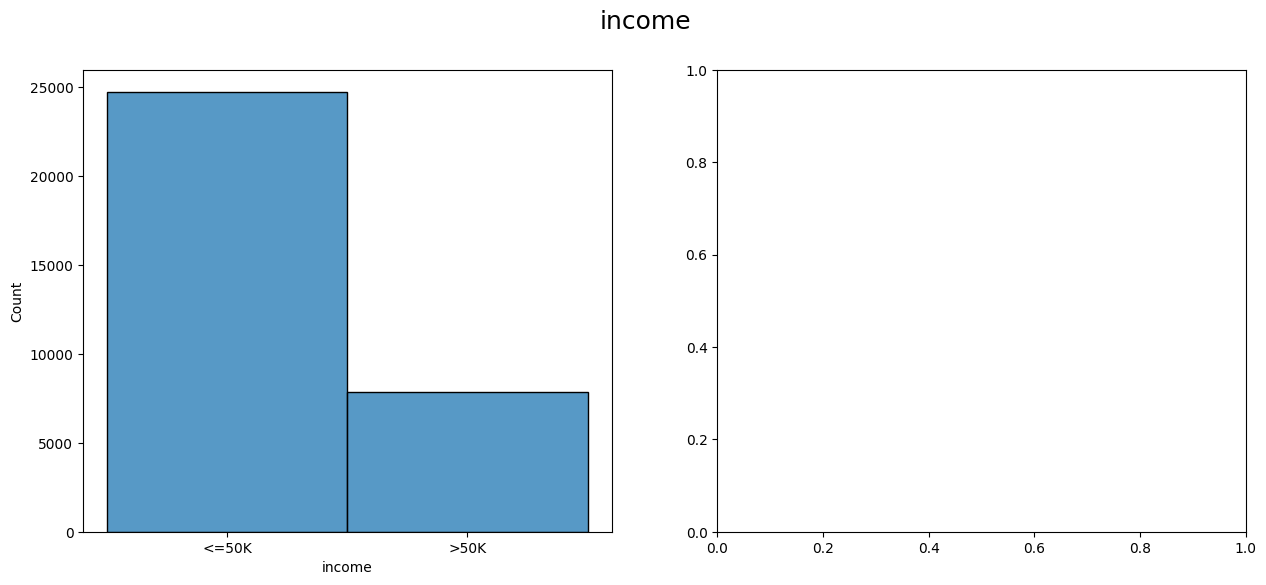

In [ ]:
# Aca podemos ver el comportamiento de la variable income 
for col in df_adult.columns:
    fig, ax =plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(col, fontsize=18)
    sns.histplot(df_adult[col], ax=ax[0], kde=False)
    if col != 'income':   
        df_adult[[col]+['income']].plot.scatter(x=col, y='income', ax=ax[1])
        plt.show()
    else:
        plt.show()

In [ ]:
#  se utiliza para realizar la codificación one-hot de una columna categórica en el DataFrame
pd.get_dummies(df_adult[categorica])

,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_<=50K,income_>50K
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
32557,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
32558,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
32559,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


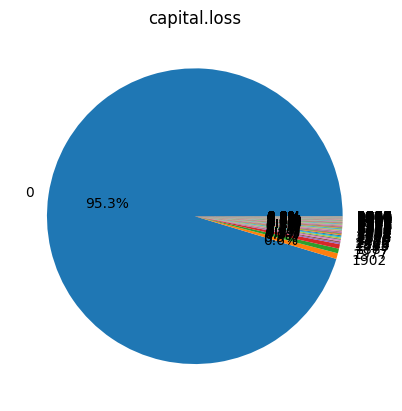

In [ ]:
#distribución de los valores en la columna "capital.loss" del DataFrame 
prov = pd.DataFrame(df_adult['capital.loss'].value_counts(dropna=False))
plt.pie(prov['capital.loss'],labels=prov['capital.loss'].index,autopct='%1.1f%%')
plt.title(label='capital.loss')
plt.show()

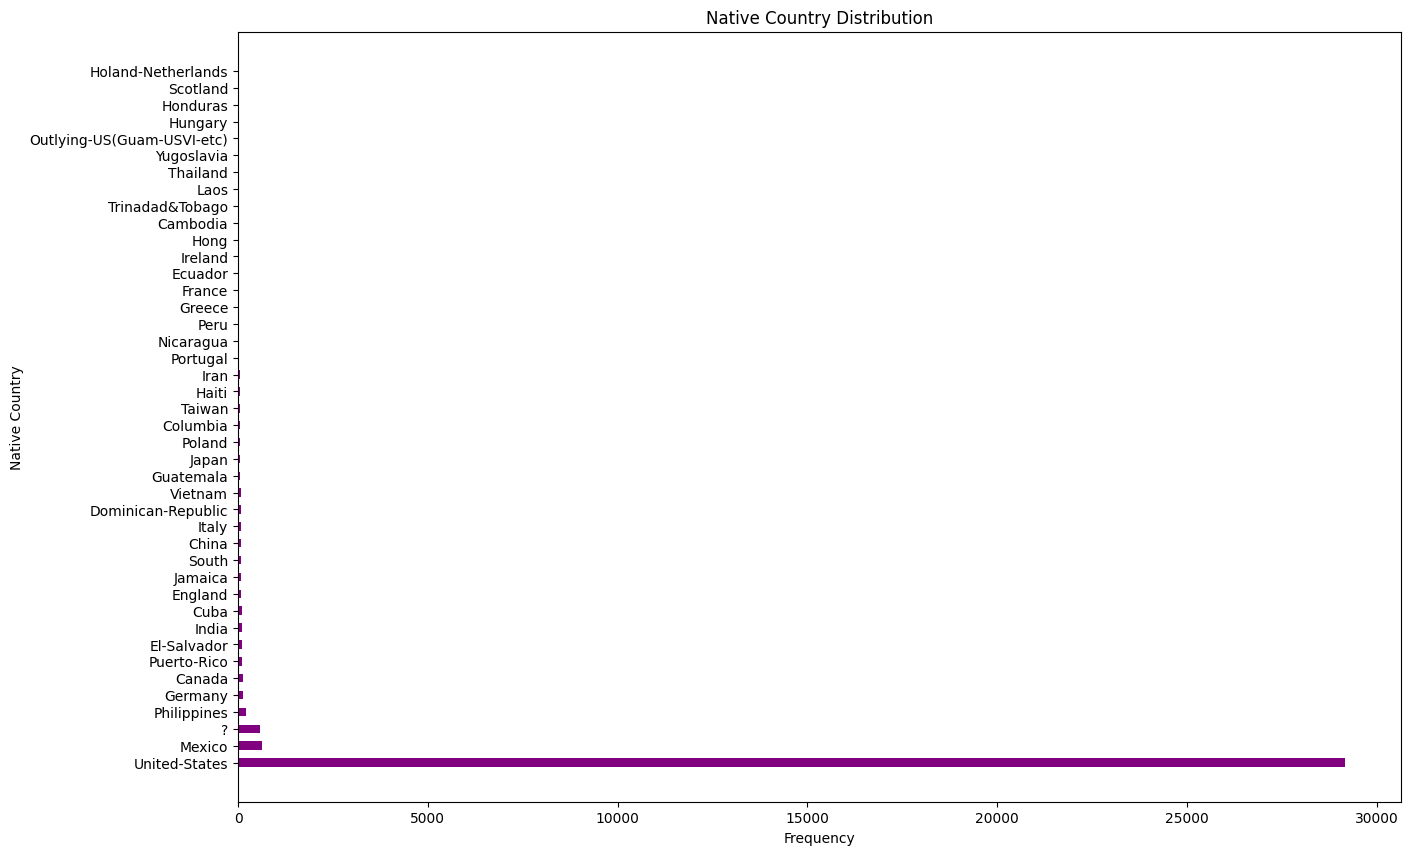

In [ ]:
#este gráfico de barras horizontales muestra la distribución de los valores en la columna 
#"native.country" del DataFrame df_adult.
#Cada barra representa un país de origen y la altura de la barra indica la frecuencia o 
#cantidad de ocurrencias de ese país en la columna.
import matplotlib.pyplot as plt
import pandas as pd

prov = pd.DataFrame(df_adult['native.country'].value_counts(dropna=False))

plt.figure(figsize=(15, 10))  # Ajusta el tamaño de la figura

bar_width = 0.5  # Anchura de las barras
bar_positions = range(len(prov['native.country']))

plt.barh(bar_positions, prov['native.country'], height=bar_width, color='purple')

plt.xlabel('Frequency')
plt.ylabel('Native Country')
plt.title('Native Country Distribution')

plt.yticks(bar_positions, prov['native.country'].index)  # Etiquetas personalizadas del eje y

plt.show()

In [ ]:
del df_adult['capital.gain']
del df_adult['capital.loss']
del df_adult['native.country']
del df_adult['education.num']

In [ ]:
#se declara label encoder
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df_adult['income'] = label_encoder.fit_transform(df_adult['income'])
df_adult['sex'] = label_encoder.fit_transform(df_adult['sex'])

In [ ]:
categorica = [var for var in df_adult.columns if df_adult[var].dtype=='O']
numerica = [var for var in df_adult.columns if df_adult[var].dtype!='O']

In [ ]:
df_adult[categorica]

,workclass,education,marital.status,occupation,relationship,race
0,?,HS-grad,Widowed,?,Not-in-family,White
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White
2,?,Some-college,Widowed,?,Unmarried,Black
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White
4,Private,Some-college,Separated,Prof-specialty,Own-child,White
...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White


In [ ]:
df_adultm = pd.concat([df_adult[numerica],pd.get_dummies(df_adult[categorica])],axis=1)

In [ ]:
df_adultm.columns

Index(['age', 'fnlwgt', 'sex', 'hours.per.week', 'income', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_10th', 'education_11th',
       'education_12th', 'education_1st-4th', 'education_5th-6th',
       'education_7th-8th', 'education_9th', 'education_Assoc-acdm',
       'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate',
       'education_HS-grad', 'education_Masters', 'education_Preschool',
       'education_Prof-school', 'education_Some-college',
       'marital.status_Divorced', 'marital.status_Married-AF-spouse',
       'marital.status_Married-civ-spouse',
       'marital.status_Married-spouse-absent', 'marital.status_Never-married',
       'marital.status_Separated', 'marital.status_Widowed', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed

In [ ]:
# declaración de variables predictoras y a predecir
x = df_adultm.drop('income',axis='columns')
y = df_adultm['income']

In [ ]:
# split de la data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
modelo = GaussianNB() # declaracion del modelo Naive Bayes
modelo.fit(x_train, y_train) # Entrenamiento del modelo
y_pred = modelo.predict(x_test) # prediccion del modelo con el test

In [ ]:
# matriz de confusion para evaluar el modelo
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)
# Se calcula la precisión del modelo
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:', precision)

Matriz de Confusión:
[[4851  124]
 [1402  136]]
Precisión del modelo: 0.5230769230769231


In [ ]:
# metricas de clasificación
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy del modelo:',accuracy)
print('F1 score del modelo:',f1_score(y_test, y_pred))
print('Recall del modelo:',recall_score(y_test, y_pred))


Accuracy del modelo: 0.7656993704897896
F1 score del modelo: 0.1512791991101224
Recall del modelo: 0.08842652795838751


# Conclusión

 Podemos concluir que el modelo tiene un accuracy razonablemente alto, pero un desempeño deficiente en términos de F1 score y recall. Esto sugiere que el modelo puede tener dificultades para clasificar correctamente las muestras positivas y es posible que se requieran mejoras o ajustes para obtener un rendimiento más equilibrado y preciso.